**Chapter 5 – Support Vector Machines**

_This notebook contains all the sample code and solutions to the exercises in chapter 5._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training SVM Classifier

In [7]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Fetch data and labels
X, y = mnist['data'], mnist['target']

# Convert target to integers (it is in string format)
y = y.astype(np.int8)

# Split data into train and test sets (60k train, 10k test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Scale the data to 0 mean and unit variance (SVMs work better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier with RBF kernel (it might take some time)
svm_clf = SVC(kernel='rbf', gamma='scale', C=10)  # gamma='scale' is a good default for RBF
svm_clf.fit(X_train, y_train)

# Predict the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.9718


# Fine-tuning SVM classifier using Random Search

In [15]:
pip install numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [8]:
X_train.shape

(56000, 784)

In [9]:
y_train.shape

(56000,)

In [10]:
X_train_20k = X_train[:20000]

In [11]:
X_train_20k.shape

(20000, 784)

In [12]:
y_train_20k = y_train[:20000]

# Polynomial SVM Classifier

In [14]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import expon, uniform

# Load the MNIST dataset
#mnist = fetch_openml('mnist_784', version=1)

# Fetch data and labels
#X, y = mnist['data'], mnist['target']

# Convert target to integers (it is in string format)
#y = y.astype(np.int8)

# Split data into train and test sets (60k train, 10k test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Scale the data (SVMs perform better on scaled data)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define the hyperparameter search space
param_dist = [
    {
        # Polynomial kernel: Optimize C, degree, and coef0
        'kernel': ['poly'],
        'C': [0.1, 1, 10],  # Regularization
        'degree': [2, 3, 4, 5],  # Degree of polynomial
        'coef0': [0.1, 1, 10]  # Independent term in polynomial kernel
    },
]

# Set up the SVM classifier
svm_clf = SVC()

# Set up the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,  # Display the process
    n_jobs=1,   # Disable parallelization
    random_state=42  # Reproducibility
)

# Fit the model using randomized search
random_search.fit(X_train_20k, y_train_20k)

# Display the best parameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model using the best found hyperparameters
best_svm = random_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with fine-tuned SVM: {accuracy:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............C=10, coef0=10, degree=5, kernel=poly; total time=  14.8s
[CV] END ..............C=10, coef0=10, degree=5, kernel=poly; total time=  14.1s
[CV] END ..............C=10, coef0=10, degree=5, kernel=poly; total time=  14.1s
[CV] END ..............C=1, coef0=0.1, degree=3, kernel=poly; total time=  18.1s
[CV] END ..............C=1, coef0=0.1, degree=3, kernel=poly; total time=  17.6s
[CV] END ..............C=1, coef0=0.1, degree=3, kernel=poly; total time=  18.0s
[CV] END .............C=10, coef0=0.1, degree=4, kernel=poly; total time=  16.1s
[CV] END .............C=10, coef0=0.1, degree=4, kernel=poly; total time=  15.6s
[CV] END .............C=10, coef0=0.1, degree=4, kernel=poly; total time=  15.8s
[CV] END ...............C=10, coef0=1, degree=4, kernel=poly; total time=  15.4s
[CV] END ...............C=10, coef0=1, degree=4, kernel=poly; total time=  15.2s
[CV] END ...............C=10, coef0=1, degree=4,

## Polynomial (Precision, Recall, F1-score, Training time)

In [24]:
# Import necessary libraries
import numpy as np
import time  # For measuring training time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter search space for the Polynomial kernel
param_dist = [
    {
        'kernel': ['poly'],  # Polynomial kernel
        'C': [0.1, 1, 10],   # Regularization parameter
        'degree': [2, 3, 4, 5],  # Degree of polynomial
        'coef0': [0.1, 1, 10]  # Independent term in polynomial kernel
    }
]

# Set up the SVM classifier
svm_clf = SVC()

# Set up the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,  # Display the process
    n_jobs=1,   # Disable parallelization
    random_state=42  # Reproducibility
)

# Measure the training time
start_time = time.time()

# Fit the model using randomized search
random_search.fit(X_train_20k, y_train_20k)

# Measure the end time and calculate the training duration
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Display the best parameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model using the best found hyperparameters
best_svm = random_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
accuracy_value = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")  # or "macro"
f1 = f1_score(y_test, y_pred, average="weighted")  # or "macro"

# Print the results
print(f"Test set accuracy with fine-tuned Polynomial SVM: {accuracy_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............C=10, coef0=10, degree=5, kernel=poly; total time=  14.5s
[CV] END ..............C=10, coef0=10, degree=5, kernel=poly; total time=  14.5s
[CV] END ..............C=10, coef0=10, degree=5, kernel=poly; total time=  14.8s
[CV] END ..............C=1, coef0=0.1, degree=3, kernel=poly; total time=  18.6s
[CV] END ..............C=1, coef0=0.1, degree=3, kernel=poly; total time=  18.6s
[CV] END ..............C=1, coef0=0.1, degree=3, kernel=poly; total time=  18.0s
[CV] END .............C=10, coef0=0.1, degree=4, kernel=poly; total time=  15.9s
[CV] END .............C=10, coef0=0.1, degree=4, kernel=poly; total time=  15.9s
[CV] END .............C=10, coef0=0.1, degree=4, kernel=poly; total time=  15.6s
[CV] END ...............C=10, coef0=1, degree=4, kernel=poly; total time=  15.1s
[CV] END ...............C=10, coef0=1, degree=4, kernel=poly; total time=  14.6s
[CV] END ...............C=10, coef0=1, degree=4,

# Radial Basis Function (RBF) SVM Classifier

In [15]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import expon, uniform

# Load the MNIST dataset
#mnist = fetch_openml('mnist_784', version=1)

# Fetch data and labels
#X, y = mnist['data'], mnist['target']

# Convert target to integers (it is in string format)
#y = y.astype(np.int8)

# Split data into train and test sets (60k train, 10k test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Scale the data (SVMs perform better on scaled data)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define the hyperparameter search space
param_dist = [
    {
        # RBF kernel: Optimize C and gamma
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],  # Regularization
        'gamma': ['scale','auto']  # Gamma for RBF kernel
    }
]

# Set up the SVM classifier
svm_clf = SVC()

# Set up the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,  # Display the process
    n_jobs=1,   # Disable parallelization
    random_state=42  # Reproducibility
)

# Fit the model using randomized search
random_search.fit(X_train_20k, y_train_20k)

# Display the best parameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model using the best found hyperparameters
best_svm = random_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with fine-tuned SVM: {accuracy:.4f}")

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  58.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  57.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  57.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 3.1min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 3.0min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 3.1min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  31.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  30.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  31.6s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 3.2min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 3.1min
[CV] END ........................C=1, gamma=auto,

## RBF (Precision, Recall, F1-score, Training time)

In [25]:
# Import necessary libraries
import numpy as np
import time  # For measuring training time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter search space for the Polynomial kernel
param_dist = [
    {
        # RBF kernel: Optimize C and gamma
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],  # Regularization
        'gamma': ['scale','auto']  # Gamma for RBF kernel
    }
]

# Set up the SVM classifier
svm_clf = SVC()

# Set up the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,  # Display the process
    n_jobs=1,   # Disable parallelization
    random_state=42  # Reproducibility
)

# Measure the training time
start_time = time.time()

# Fit the model using randomized search
random_search.fit(X_train_20k, y_train_20k)

# Measure the end time and calculate the training duration
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Display the best parameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model using the best found hyperparameters
best_svm = random_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
accuracy_value = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")  # or "macro"
f1 = f1_score(y_test, y_pred, average="weighted")  # or "macro"

# Print the results
print(f"Test set accuracy with fine-tuned RBF SVM: {accuracy_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  56.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  55.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  55.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 3.1min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 3.1min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 3.1min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  32.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  32.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  32.6s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 3.2min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 3.2min
[CV] END ........................C=1, gamma=auto,

# Linear SVM Classifier

In [17]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Load the MNIST dataset
#mnist = fetch_openml('mnist_784', version=1)

# Fetch data and labels
#X, y = mnist['data'], mnist['target']

# Convert target to integers (it is in string format)
#y = y.astype(np.int8)

# Split data into train and test sets (60k train, 10k test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Scale the data (SVMs perform better on scaled data)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define the hyperparameter search space for the Linear kernel
param_dist = {
    'C': [0.1, 1, 10]  # Regularization parameter for the Linear kernel
}

# Set up the SVM classifier with Linear kernel
svm_clf = SVC(kernel='linear')

# Set up the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,  # Display the process
    n_jobs=-1,  # Use all available cores
    random_state=42  # Reproducibility
)

# Fit the model using randomized search
random_search.fit(X_train_20k, y_train_20k)

# Display the best hyperparameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model using the best found hyperparameters
best_svm = random_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with fine-tuned Linear SVM: {accuracy:.4f}")

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best hyperparameters: {'C': 0.1}
Test set accuracy with fine-tuned Linear SVM: 0.9076


## Linear (Precision, Recall, F1-score, Training time)

In [26]:
# Import necessary libraries
import numpy as np
import time  # For measuring training time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter search space for the Polynomial kernel
param_dist = [
    {
        'C': [0.1, 1, 10]  # Regularization parameter for the Linear kernel
    }
]

# Set up the SVM classifier with Linear kernel
svm_clf = SVC(kernel='linear')

# Set up the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,  # Display the process
    n_jobs=-1,  # Use all available cores
    random_state=42  # Reproducibility
)

# Measure the training time
start_time = time.time()

# Fit the model using randomized search
random_search.fit(X_train_20k, y_train_20k)

# Measure the end time and calculate the training duration
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Display the best parameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model using the best found hyperparameters
best_svm = random_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
accuracy_value = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")  # or "macro"
f1 = f1_score(y_test, y_pred, average="weighted")  # or "macro"

# Print the results
print(f"Test set accuracy with fine-tuned Linear SVM: {accuracy_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Training time: 104.37 seconds
Best hyperparameters: {'C': 0.1}
Test set accuracy with fine-tuned Linear SVM: 0.9076
Precision: 0.9077
Recall: 0.9076
F1 Score: 0.9072


# Comparison of SVM Kernels

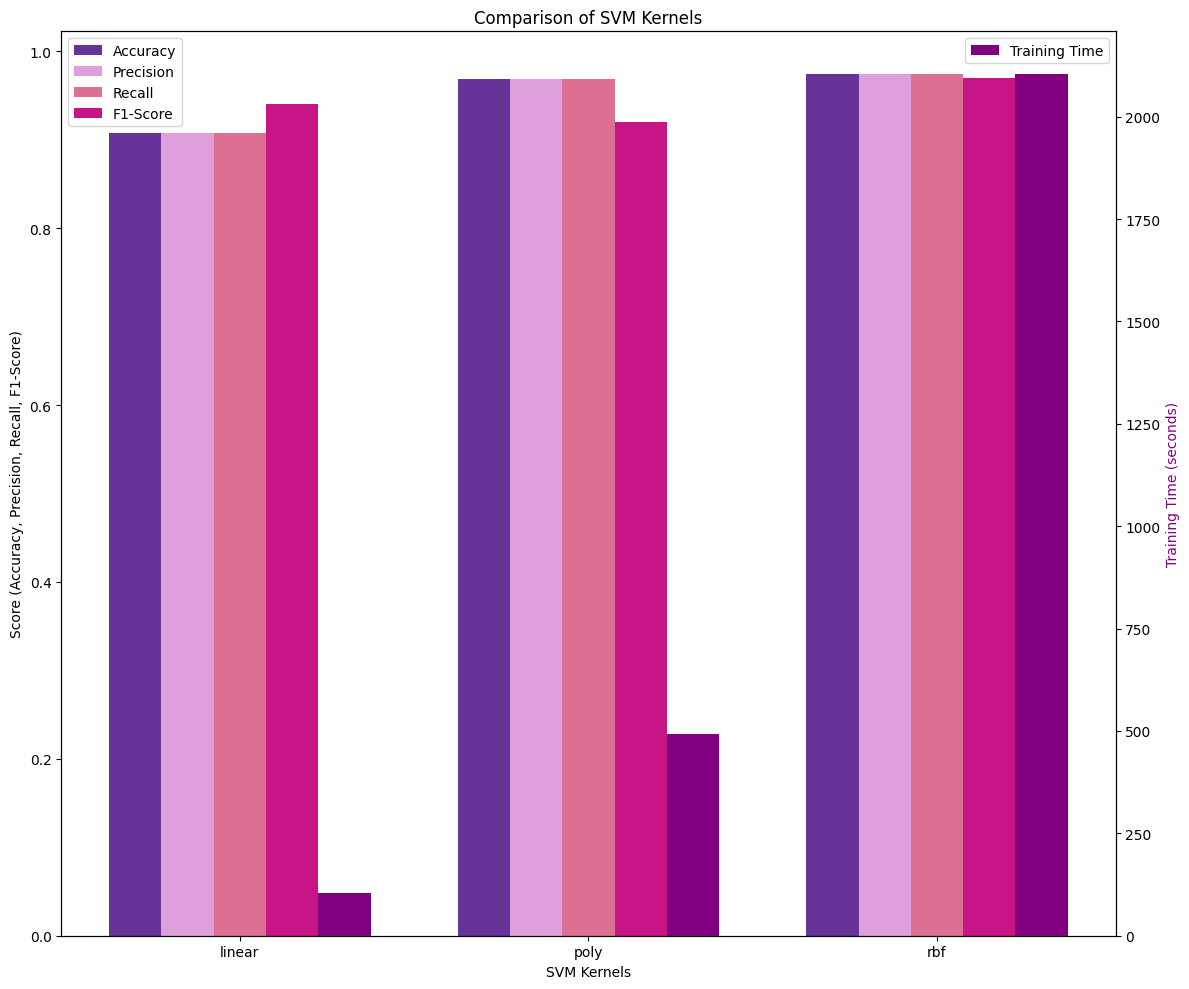

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the kernels and metrics
kernels = ['linear', 'poly', 'rbf']  # Add your kernels here

# Assuming these are the scores you have already calculated
accuracy = [0.9076, 0.9692, 0.9739]  # Example accuracy scores for each kernel
precision = [0.9077, 0.9692, 0.9739]  # Example precision scores
recall = [0.9076, 0.9692, 0.9739]  # Example recall scores
f1_score = [0.94, 0.92, 0.97]  # Example F1-scores
training_time = [104.37, 493.15, 2103.27]  # Example training times (in seconds)

# Create a single histogram for comparison
bar_width = 0.15
index = np.arange(len(kernels))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot bars for Accuracy, Precision, Recall, F1-Score
bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='RebeccaPurple')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision', color='Plum')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='PaleVioletRed')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', color='MediumVioletRed')

# Secondary y-axis for Training Time
ax2 = ax.twinx()
bar5 = ax2.bar(index + 4 * bar_width, training_time, bar_width, label='Training Time', color='purple')

# Set labels and title
ax.set_xlabel('SVM Kernels')
ax.set_ylabel('Score (Accuracy, Precision, Recall, F1-Score)')
ax2.set_ylabel('Training Time (seconds)', color='purple')

# Set x-ticks
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(kernels)

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Comparison of SVM Kernels')
plt.tight_layout()
plt.show()

# KNN Classifier

In [28]:
import time
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Range of n_neighbors to explore
    'weights': ['uniform', 'distance']  # Weighting schemes to explore
}

# Setup the GridSearchCV with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Time the grid search fitting
start_time = time.time()

# Fit the grid search model on the training data
grid_search.fit(X_train_20k, y_train_20k)

# Measure the training time
train_time = time.time() - start_time

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the optimized KNN model using the best hyperparameters
knn_optimized = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# Time the training of the final model
start_time = time.time()

# Train the final model on the entire training set
knn_optimized.fit(X_train_20k, y_train_20k)

# Measure the final model training time
train_time_final = time.time() - start_time

# Time the prediction process
start_time = time.time()

# Make predictions on the test set
y_pred = knn_optimized.predict(X_test)

# Measure prediction time
test_time = time.time() - start_time

# Compute the test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print timing information
print(f"Grid search training time: {train_time:.2f} seconds")
print(f"Final model training time: {train_time_final:.2f} seconds")
print(f"Test prediction time: {test_time:.2f} seconds")

# Check if the accuracy target of 97% was achieved
if test_accuracy >= 0.97:
    print("Goal achieved! The KNN classifier has at least 97% accuracy on the test set.")
else:
    print("Accuracy did not reach the 97% target.")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test set accuracy: 0.9704
Precision: 0.9705
Recall: 0.9704
F1 Score: 0.9703
Grid search training time: 226.70 seconds
Final model training time: 0.00 seconds
Test prediction time: 9.15 seconds
Goal achieved! The KNN classifier has at least 97% accuracy on the test set.


# SGD Classifier

In [30]:
import time
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGD classifier
sgd = SGDClassifier(random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization types
    'max_iter': [10, 20, 30],  # Number of iterations
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Learning rate schedule
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(sgd, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Time the grid search fitting
start_time = time.time()

# Fit the grid search model on the training data
grid_search.fit(X_train_20k, y_train_20k)

# Measure the training time for Grid Search
train_time = time.time() - start_time

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the final model using the best hyperparameters
sgd_optimized = SGDClassifier(
    alpha=best_params['alpha'],
    penalty=best_params['penalty'],
    max_iter=best_params['max_iter'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Time the training of the final model
start_time = time.time()

# Train the optimized model on the training data
sgd_optimized.fit(X_train_20k, y_train_20k)

# Measure the training time for the final model
train_time_final = time.time() - start_time

# Time the prediction process
start_time = time.time()

# Make predictions on the test set
y_pred = sgd_optimized.predict(X_test)

# Measure prediction time
test_time = time.time() - start_time

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"SGD Classifier Test Set Accuracy: {test_accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print the evaluation results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print timing information
print(f"Grid search training time: {train_time:.2f} seconds")

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
162 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

Best hyperparameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'max_iter': 10, 'penalty': 'l1'}
SGD Classifier Test Set Accuracy: 0.9024
Precision: 0.9037
Recall: 0.9024
F1 Score: 0.9027
Grid search training time: 106.75 seconds


C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


# Random Forest Classifier

In [31]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Time the training of the baseline model
start_time = time.time()

# Train the Random Forest model on the training data
rf.fit(X_train_20k, y_train_20k)

# Measure training time for the baseline model
train_time = time.time() - start_time

# Time the predictions on the test set
start_time = time.time()

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Measure prediction time
test_time = time.time() - start_time

# Calculate the accuracy on the test set
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10, 20, 30],           # Number of trees
    'max_depth': [10, 20, 30, None],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples at leaf nodes
}

# Initialize the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring='accuracy')

# Time the grid search fitting
start_time = time.time()

# Fit the grid search model on the training data
grid_search.fit(X_train_20k, y_train_20k)

# Measure the training time for Grid Search
train_time_grid_search = time.time() - start_time

# Output the best hyperparameters found by grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the Random Forest classifier using the best hyperparameters
rf_optimized = RandomForestClassifier(**best_params, random_state=42)

# Time the training of the optimized model
start_time = time.time()

# Train the optimized model on the entire training set
rf_optimized.fit(X_train_20k, y_train_20k)

# Measure training time for the optimized model
train_time_optimized = time.time() - start_time

# Time the predictions for the optimized model
start_time = time.time()

# Make predictions on the test set using the optimized model
y_pred_optimized = rf_optimized.predict(X_test)

# Measure prediction time for the optimized model
test_time_optimized = time.time() - start_time

# Calculate the accuracy on the test set for the optimized model
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Test Set Accuracy: {optimized_accuracy:.4f}")

# Calculate precision, recall, and F1-score for the optimized model
precision = precision_score(y_test, y_pred_optimized, average="weighted")
recall = recall_score(y_test, y_pred_optimized, average="weighted")
f1 = f1_score(y_test, y_pred_optimized, average="weighted")

# Print the evaluation results for the optimized model
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print timing information
print(f"Grid search training time: {train_time_grid_search:.2f} seconds")

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Baseline Accuracy: 0.9693
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}
Optimized Test Set Accuracy: 0.9630
Precision: 0.9629
Recall: 0.9630
F1 Score: 0.9630
Grid search training time: 84.80 seconds


C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Comparison of the Four Classifiers

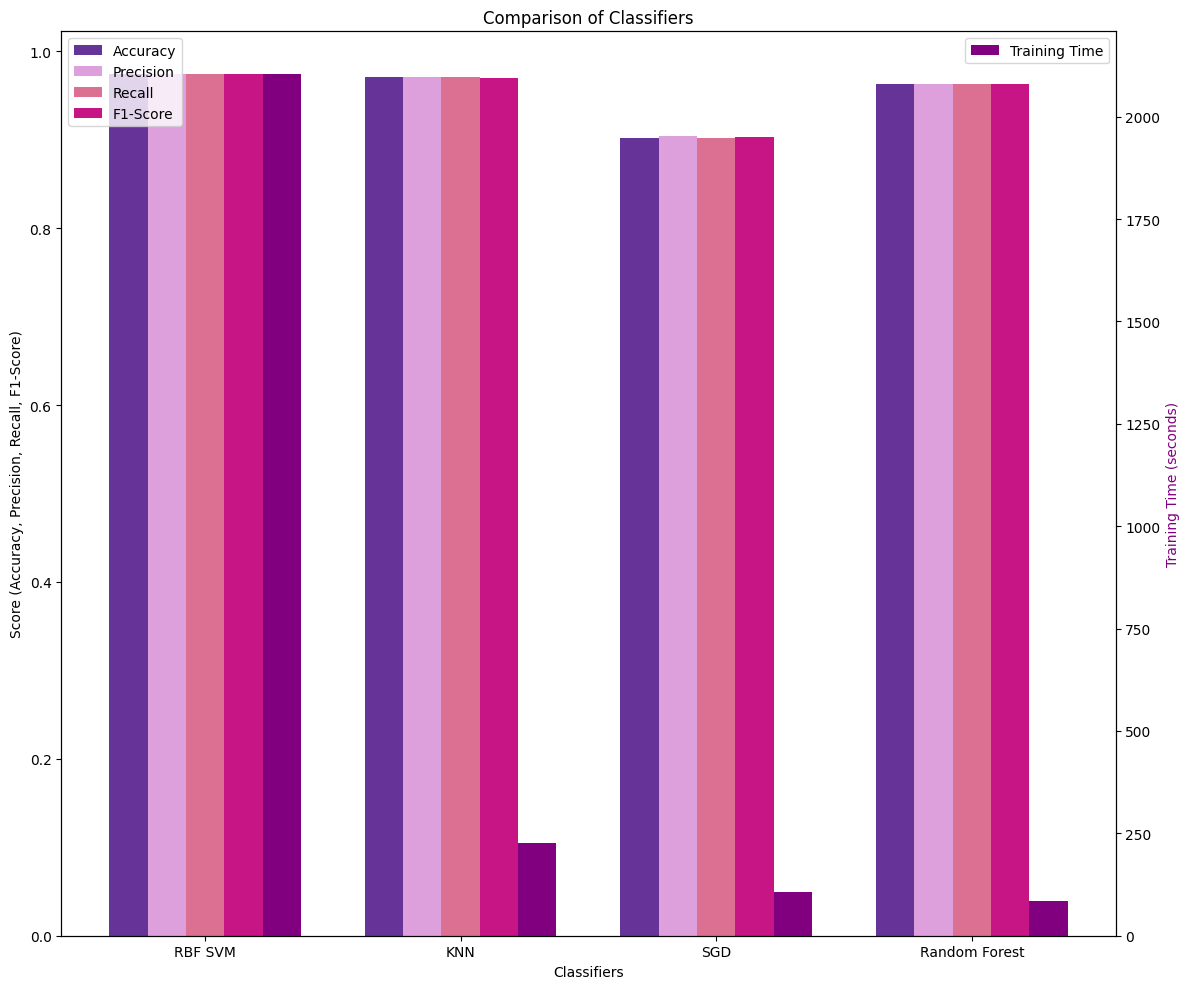

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the classifiers and metrics
classifiers = ['RBF SVM', 'KNN', 'SGD', 'Random Forest']

# Assuming these are the scores you have already calculated
accuracy = [0.9739, 0.9704, 0.9024, 0.9630]
precision = [0.9739, 0.9705, 0.9037, 0.9629]
recall = [0.9739, 0.9704, 0.9024, 0.9630]
f1_score = [0.9738, 0.9703, 0.9027, 0.9630]
training_time = [2103.27, 226.70, 106.75, 84.80]

# Create a single histogram for comparison
bar_width = 0.15
index = np.arange(len(classifiers))  # Corrected to match classifiers length

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot bars for Accuracy, Precision, Recall, F1-Score
bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='RebeccaPurple')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision', color='Plum')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='PaleVioletRed')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', color='MediumVioletRed')

# Secondary y-axis for Training Time
ax2 = ax.twinx()
bar5 = ax2.bar(index + 4 * bar_width, training_time, bar_width, label='Training Time', color='purple')

# Set labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Score (Accuracy, Precision, Recall, F1-Score)')
ax2.set_ylabel('Training Time (seconds)', color='purple')

# Set x-ticks
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(classifiers)

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Comparison of Classifiers')
plt.tight_layout()
plt.show()

# Linear SVM Classification

The next few code cells generate the first figures in chapter 5. The first actual code sample comes after.

**Code to generate Figure 5–1. Large margin classification**

In [7]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


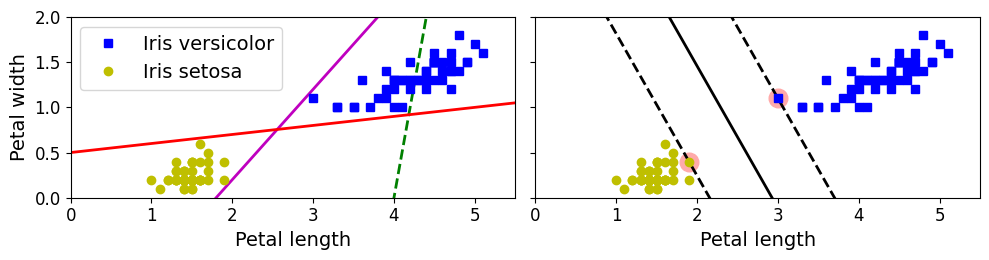

In [8]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

**Code to generate Figure 5–2. Sensitivity to feature scales**

Saving figure sensitivity_to_feature_scales_plot


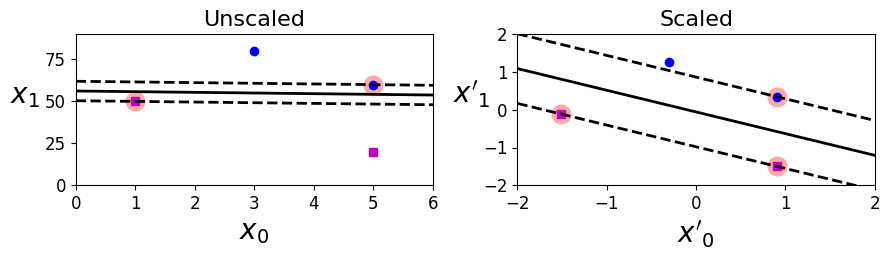

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


## Soft Margin Classification
**Code to generate Figure 5–3. Hard margin sensitivity to outliers**

Saving figure sensitivity_to_outliers_plot


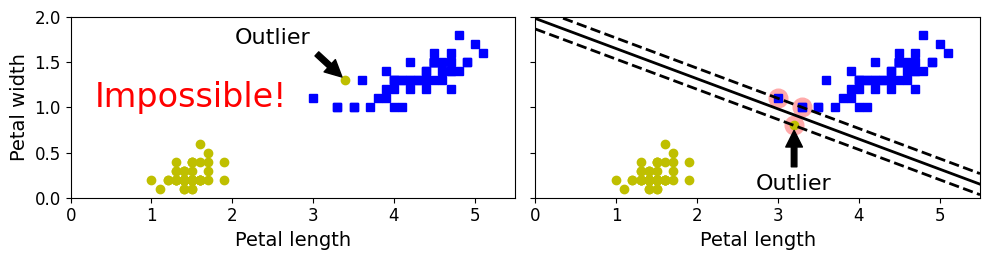

In [10]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

**This is the first code example in chapter 5:**

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**Code to generate Figure 5–4. Large margin versus fewer margin violations**

In [12]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [13]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


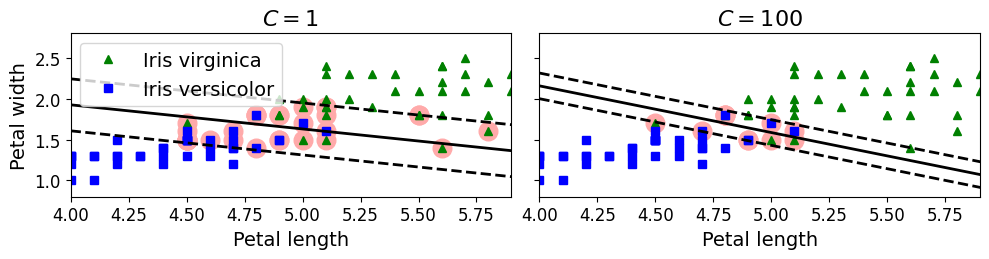

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# Nonlinear SVM Classification

**Code to generate Figure 5–5. Adding features to make a dataset linearly separable**

Saving figure higher_dimensions_plot


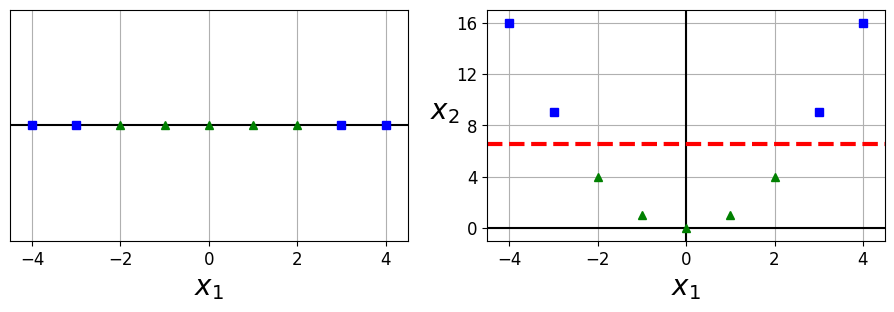

In [15]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

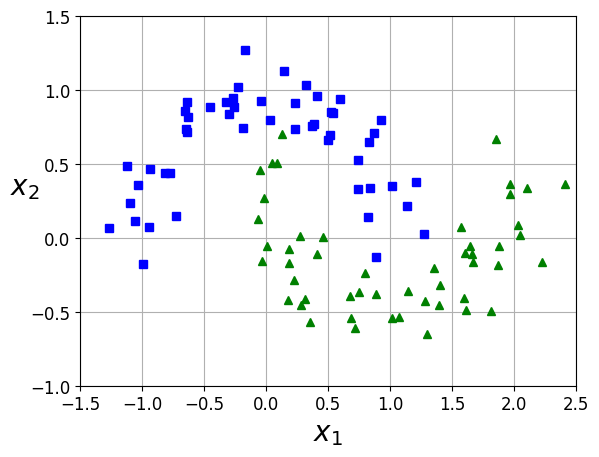

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**Here is second code example in the chapter:**

In [17]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\ayema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

**Code to generate Figure 5–6. Linear SVM classifier using polynomial features**

Saving figure moons_polynomial_svc_plot


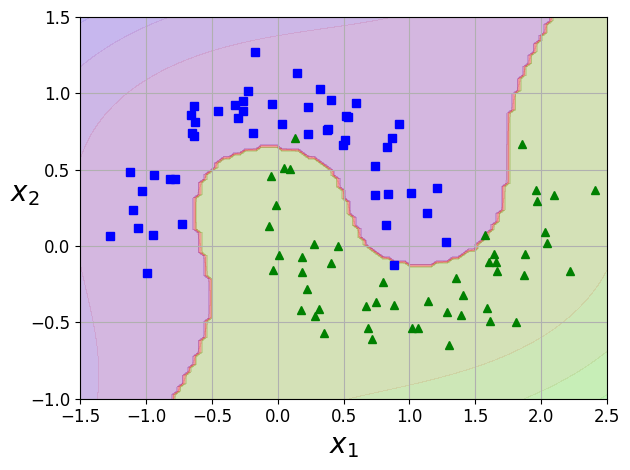

In [18]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

**Next code example:**

In [19]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

**Code to generate Figure 5–7. SVM classifiers with a polynomial kernel**

In [20]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


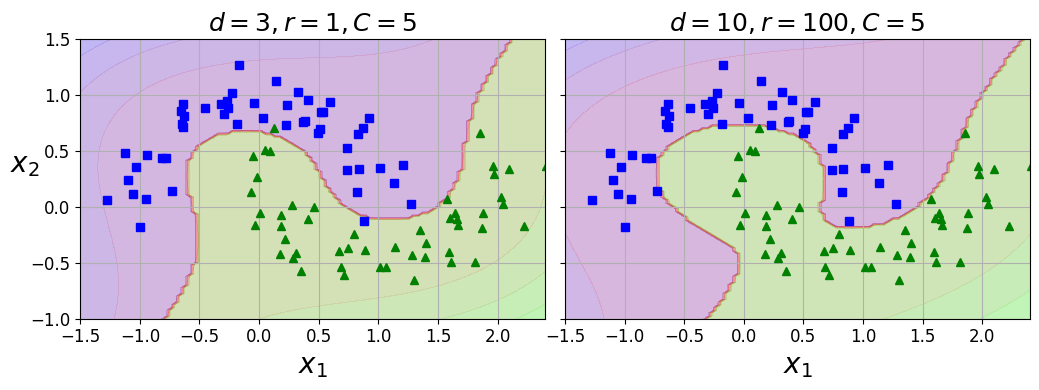

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Similarity Features

**Code to generate Figure 5–8. Similarity features using the Gaussian RBF**

Saving figure kernel_method_plot


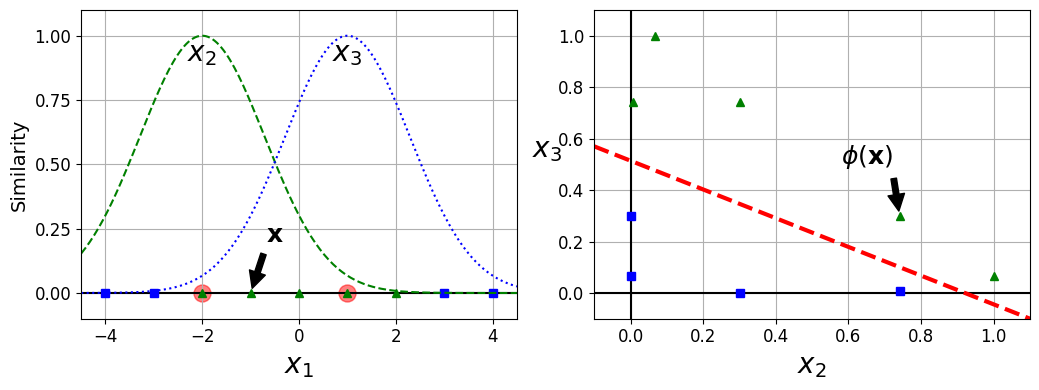

In [22]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

In [23]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


## Gaussian RBF Kernel

**Next code example:**

In [24]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

**Code to generate Figure 5–9. SVM classifiers using an RBF kernel**

Saving figure moons_rbf_svc_plot


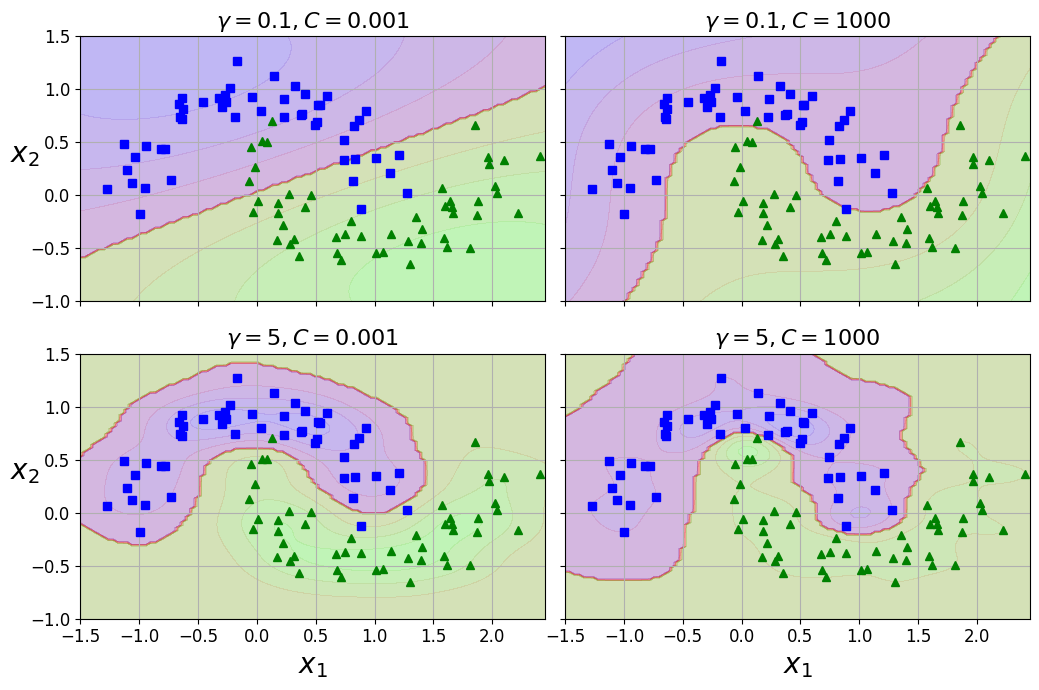

In [25]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

# SVM Regression

In [26]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

**Next code example:**

In [27]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

**Code to generate Figure 5–10. SVM Regression**

In [28]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Saving figure svm_regression_plot


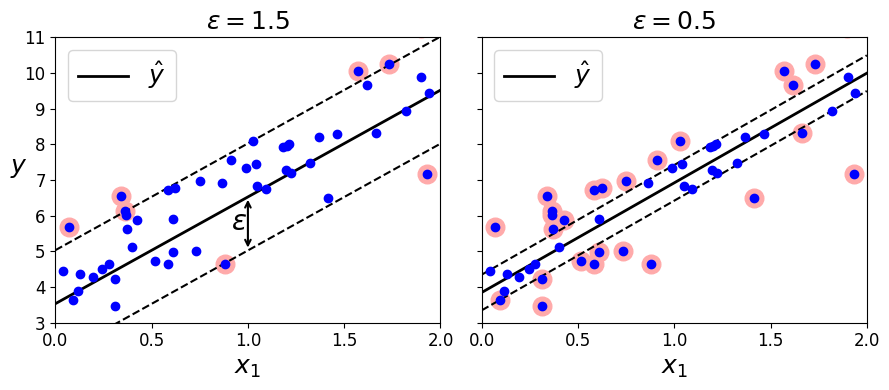

In [29]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

In [30]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

**Note**: to be future-proof, we set `gamma="scale"`, as this will be the default value in Scikit-Learn 0.22.

**Next code example:**

In [31]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

**Code to generate Figure 5–11. SVM Regression using a second-degree polynomial kernel**

In [32]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

In [35]:
print(X.shape)
print(y.shape)
print(svm_poly_reg2.support_.shape)

(100, 1)
(100,)
(36,)


Saving figure svm_with_polynomial_kernel_plot


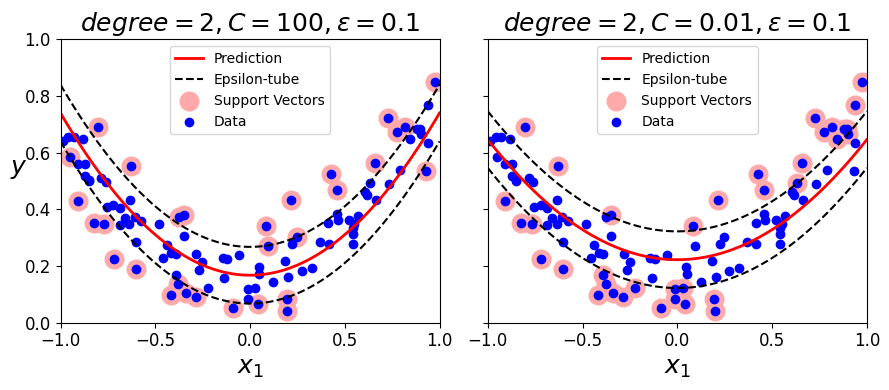

In [36]:
# Function to plot SVM regression results
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(-1, 1)
    y_pred = svm_reg.predict(x1s)
    
    # Plot the regression line
    plt.plot(x1s, y_pred, "r-", linewidth=2, label="Prediction")
    
    # Plot the epsilon-tube (margin)
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--", label="Epsilon-tube")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    
    # Plot the support vectors if svm_reg has the 'support_' attribute
    if hasattr(svm_reg, "support_"):
        plt.scatter(X[svm_reg.support_, 0], y[svm_reg.support_], s=180, facecolors='#FFAAAA', label="Support Vectors")
    
    # Plot the original data points
    plt.scatter(X, y, color="blue", label="Data")
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend()

# Plotting
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# First plot
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# Second plot
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

# Save the figure
save_fig("svm_with_polynomial_kernel_plot")

plt.show()


# Under the Hood
## Decision Function and Predictions

**Code to generate Figure 5–12. Decision function for the iris dataset**

In [37]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

**Code to generate Figure 5–13. A smaller weight vector results in a larger margin**

Saving figure small_w_large_margin_plot


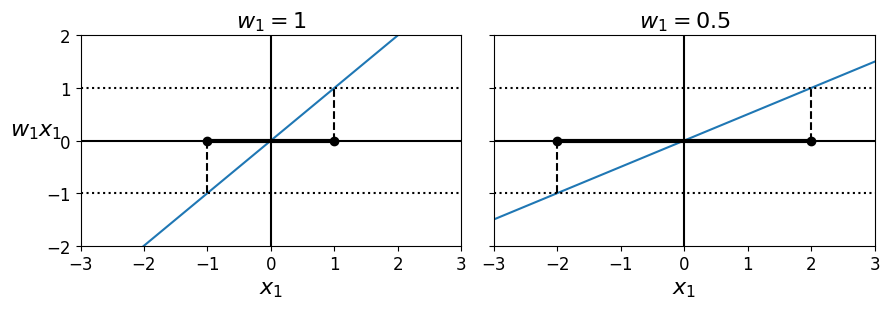

In [38]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig("small_w_large_margin_plot")
plt.show()

In [39]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

**Code to generate the Hinge Loss figure:**

Saving figure hinge_plot


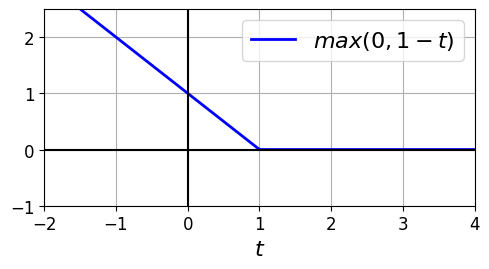

In [40]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
save_fig("hinge_plot")
plt.show()